In [1]:
import seaborn as sns
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 24D4-1D31

 Directory of C:\Users\tharg\uoa_class20

05/05/2020  04:41 AM    <DIR>          .
05/05/2020  04:41 AM    <DIR>          ..
05/05/2020  04:26 AM    <DIR>          .ipynb_checkpoints
05/05/2020  04:15 AM           276,506 bachelors_degrees_by_gender.ipynb
05/02/2020  09:00 PM            68,673 cov19_2020_05_02.csv
05/05/2020  04:41 AM           178,322 covid_demo.ipynb
05/04/2020  10:39 PM    <DIR>          etc
05/05/2020  04:34 AM             2,297 grouped_covid_sample.csv
05/04/2020  10:25 PM    <DIR>          Include
05/04/2020  10:25 PM    <DIR>          Lib
05/03/2020  04:04 PM           304,709 notebook_sklearn.ipynb
05/04/2020  10:25 PM                89 pyvenv.cfg
04/28/2020  01:37 PM               841 required_packages.txt
05/04/2020  10:39 PM    <DIR>          Scripts
05/05/2020  04:14 AM           333,803 seaborn_module.ipynb
05/04/2020  10:38 PM    <DIR>          share
               8 File(s)      1,165,240 

In [3]:
pwd

'C:\\Users\\tharg\\uoa_class20'

In [4]:
df = pd.read_csv('cov19_2020_05_02.csv')

In [5]:
# help(pd.read_csv)

In [6]:
#df.head()
df.sample(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
192,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,114,121,127,136,139,144,152,157,162,169


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 105 entries, Province/State to 5/1/20
dtypes: float64(2), int64(101), object(2)
memory usage: 218.3+ KB


In [8]:
df.loc[df['Province/State'].notnull(), 'Province/State']#.count()

8          Australian Capital Territory
9                       New South Wales
10                   Northern Territory
11                           Queensland
12                      South Australia
                     ...               
250              British Virgin Islands
251            Turks and Caicos Islands
256    Bonaire, Sint Eustatius and Saba
258         Falkland Islands (Malvinas)
259           Saint Pierre and Miquelon
Name: Province/State, Length: 82, dtype: object

In [9]:
len(df.loc[df['Province/State'].notnull(), 'Province/State'])

82

In [10]:
df.loc[df['Country/Region'].isnull()] # check for Nan in all df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20


In [11]:
type((df.loc[df['Province/State'].notnull(), 'Province/State']))

pandas.core.series.Series

In [12]:
# help(pd.core.series.Series)

In [13]:
my_df = df.drop(columns=['Lat', 'Long', 'Province/State'])
# help(df.drop)

In [14]:
my_df.head(3)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
1,Albania,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
2,Algeria,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453


In [15]:
# help(df.loc)

In [16]:
# datatype(df['Province/State'])

In [17]:
df.columns[df.isna().any()]#.tolist()  # Check all columns for NaN, # return as list
#my_df.columns[my_df.isna().any()]

Index(['Province/State'], dtype='object')

# Examine a group of countries

In [18]:
countries = ['Italy', 'France', 'Spain', 'United Kingdom', 'Germany'] #'Greece'

In [19]:
c_df = my_df.loc[df['Country/Region'].isin(countries)]
c_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
107,France,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
108,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,France,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
110,France,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
111,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,France,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,3,3,3,3,3
115,France,0,0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
116,France,0,0,0,0,0,0,0,0,0,...,21309,21825,22214,22583,22825,23262,23629,24056,24345,24563


In [20]:
#df.loc[df['Country/Region'].str.contains('USA')]

In [21]:
group_df = c_df.groupby('Country/Region').sum()

In [22]:
group_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,0,0,0,0,0,0,0,0,...,21342,21858,22248,22617,22859,23296,23663,24090,24379,24597
Germany,0,0,0,0,0,0,0,0,0,0,...,5279,5575,5760,5877,5976,6126,6314,6467,6623,6736
Italy,0,0,0,0,0,0,0,0,0,0,...,25085,25549,25969,26384,26644,26977,27359,27682,27967,28236
Spain,0,0,0,0,0,0,0,0,0,0,...,21717,22157,22524,22902,23190,23521,23822,24275,24543,24543
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,21111,21840,22853,23697,24117,24458,25369,26166,26842,27583


In [23]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, France to United Kingdom
Columns: 101 entries, 1/22/20 to 5/1/20
dtypes: int64(101)
memory usage: 4.0+ KB


In [24]:
# group_df.iloc[ :, :].columns = pd.to_datetime(group_df.iloc[ :, 0:].columns)

In [25]:
# new_df.columns = pd.DatetimeIndex(group_df.iloc[ :, 0:].columns)

In [26]:
group_df.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20', '4/27/20',
       '4/28/20', '4/29/20', '4/30/20', '5/1/20'],
      dtype='object', length=101)

In [27]:
group_df_t = group_df.T

In [28]:
group_df_t.head()

Country/Region,France,Germany,Italy,Spain,United Kingdom
1/22/20,0,0,0,0,0
1/23/20,0,0,0,0,0
1/24/20,0,0,0,0,0
1/25/20,0,0,0,0,0
1/26/20,0,0,0,0,0


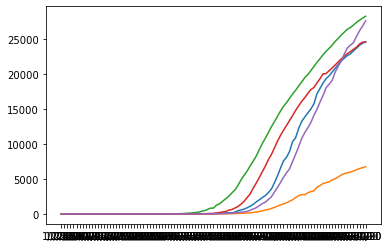

In [29]:
plt.plot(group_df_t);

In [30]:
# enjoy!
# group_df.plot()

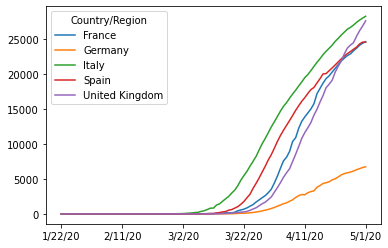

In [31]:
group_df_t.plot()

In [32]:
group_df_t = group_df_t.iloc[25:]

In [33]:
group_df_t[:20]

Country/Region,France,Germany,Italy,Spain,United Kingdom
2/16/20,1,0,0,0,0
2/17/20,1,0,0,0,0
2/18/20,1,0,0,0,0
2/19/20,1,0,0,0,0
2/20/20,1,0,0,0,0
2/21/20,1,0,1,0,0
2/22/20,1,0,2,0,0
2/23/20,1,0,3,0,0
2/24/20,1,0,7,0,0
2/25/20,1,0,10,0,0


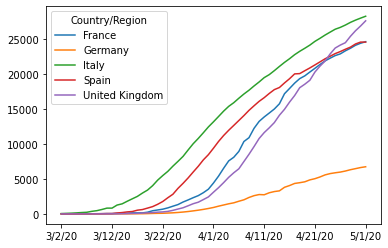

In [34]:
group_df_t[15:].plot()

In [35]:
# grup_df_t.to_csv('grouped_covid_sample.csv', encoding='utf-8', index=True)

# Examine Italy

In [36]:
italy = group_df_t['Italy']
italy.head()

2/16/20    0
2/17/20    0
2/18/20    0
2/19/20    0
2/20/20    0
Name: Italy, dtype: int64

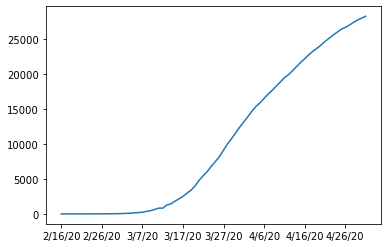

In [37]:
italy.plot()

In [38]:
# In case we want to added to the country_df DataFrame
daily_cases_italy = [y - x for x, y in zip(italy, italy[1:])]

In [39]:
daily_cases_italy[1:15]

[0, 0, 0, 1, 1, 1, 4, 3, 2, 5, 4, 8, 5, 18]

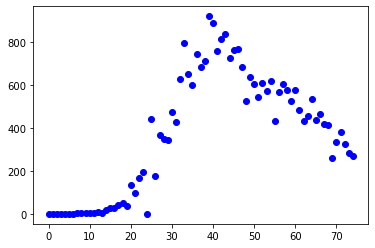

In [40]:
plt.plot(daily_cases_italy, 'bo')

In [41]:
# help(plt.plot)